# Math Camp Assignment

Click on the code cell (cell 1), then click <kbd>>RUN</kbd> to run this code hosted on [Binder](https://mybinder.org/v2/gh/zsiegel92/mathcamp/master?filepath=assignments%2FMath%20Camp%20Assignment%20with%20Slider.ipynb).

If you don't click <kbd>>RUN</kbd>, you will see a static image of the results. If you do click <kbd>>RUN</kbd>, you can scroll to the bottom and interact with the plot. There are sliders that change the following:

* Standard deviation of errors
* Slope of process that generates data
* Intercept of process that generates data

In all cases, moving the slider re-generates data and performs regression to find and plot the line of best fit.


<IPython.core.display.Javascript object>


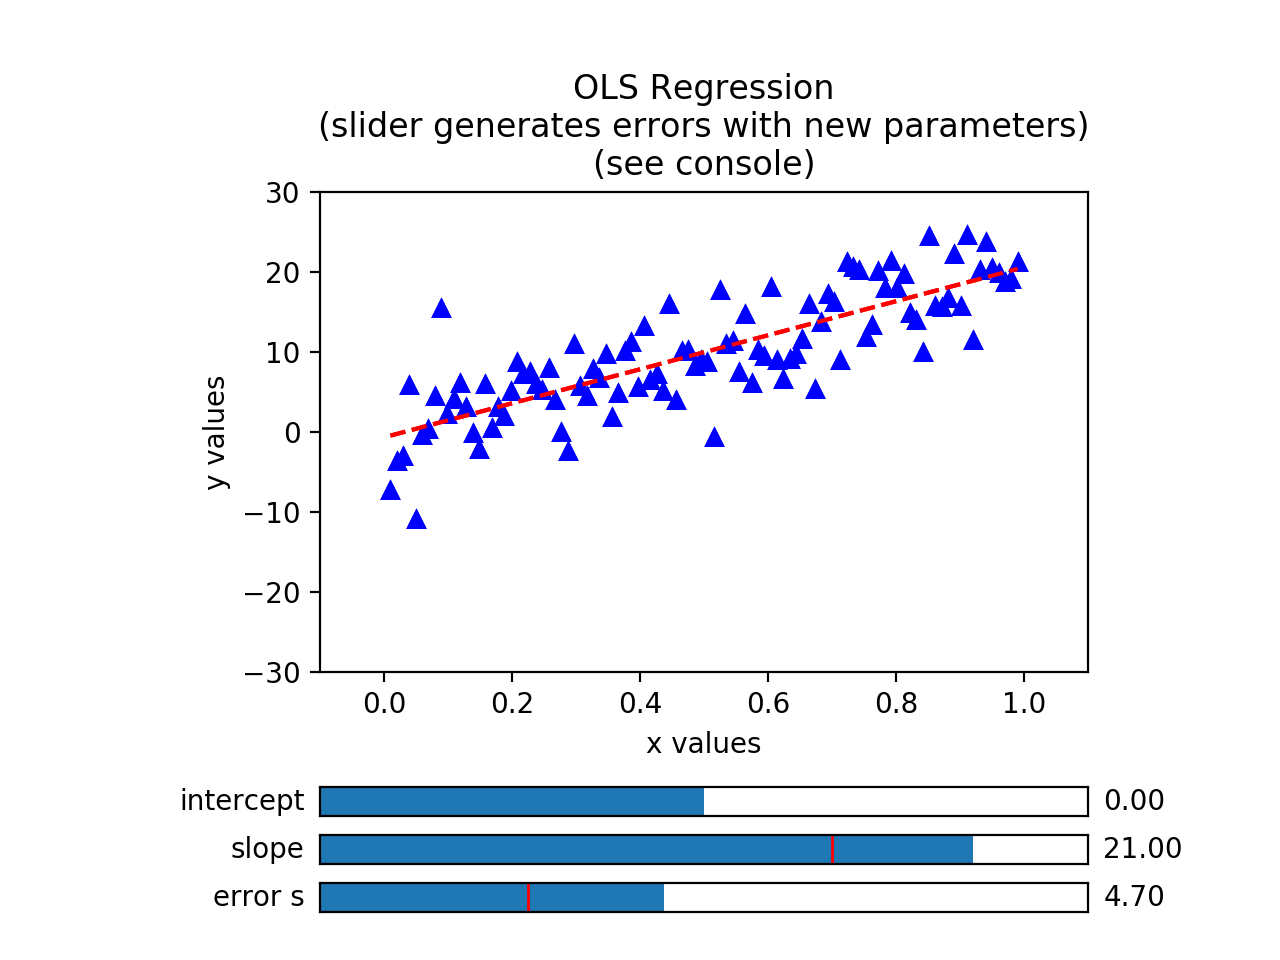

true intercept = 5, true slope = 10
estimated intercept = 3.9771653966292626, estimated slope = 11.274154675838078


In [1]:
%matplotlib notebook
#visit https://mybinder.org/v2/gh/zsiegel92/mathcamp/master?filepath=assignments%2FMath%20Camp%20Assignment%20with%20Slider.ipynb
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from numpy.random import normal as randn
from numpy import matrix, asscalar
from numpy.linalg import inv


alpha = 5 #y-intercept
beta = 10 #slope
error_std_dev = 3
n = 100
min = 0.01
max = 1



# plot_ax = plt.axes([0.25, 0.35, 0.6, 0.5],)
# plot_ax = plt.axes([a1, a2, a3, a4],)
alpha_slider_ax = plt.axes([0.25, 0.15, 0.6, 0.03])
beta_slider_ax = plt.axes([0.25,0.1,0.6,0.03])
deviation_slider_ax = plt.axes([0.25,0.05,0.6,0.03])

# plot_ax.set_yticklabels([])
# plot_ax.set_xticklabels([])
# plt.xticks([])
# plt.yticks([])

xvals = [min + x*(max-min)/n for x in range(n)]
X = matrix([[1,x] for x in xvals])


beta_slider = Slider(beta_slider_ax, 'slope', -30, 30.0, valinit=10, valstep=1)
alpha_slider = Slider(alpha_slider_ax, 'intercept', -4, 4, valinit=5, valstep=0.5)
deviation_slider = Slider(deviation_slider_ax, 'error s', 0.4, 10, valinit=3, valstep=0.1)


# ax = plt.axes(plot_ax)


def update(a,b,s):
	global alpha, beta
	alpha = a
	beta = b
	y_exact = [beta*x + alpha for x in xvals]
	errors = [randn(0,s) for x in range(n)]
	y_measured = [y_exact[i] + errors[i] for i in range(n)]
	y_measured_matrix = matrix([[y] for y in y_measured]) #turn list into nx1 matrix (vector)
	OLS = inv(X.transpose() * X) * X.transpose() * y_measured_matrix #Estimating alpha and beta
	alpha_hat = OLS[0][0].item()
	beta_hat = OLS[1][0].item()
	y_estimated = [alpha_hat + beta_hat * x for x in xvals]
	plot_ax = plt.axes([.25, .3, .6, .5],xlim=(-0.5,1),ylim=(-25,25))
	ax = plt.axes(plot_ax)
	ax.clear()
	line1 = ax.plot(xvals,y_measured,'b^')[0]
	line2 = ax.plot(xvals,y_estimated,'r--')[0]
	line1.set_data(xvals,y_measured)
	line2.set_data(xvals,y_estimated)
	print(f"true intercept = {alpha}, true slope = {beta}\nestimated intercept = {alpha_hat}, estimated slope = {beta_hat}")
	line1 = ax.plot(xvals,y_measured,'b^')[0]
	line2 = ax.plot(xvals,y_estimated,'r--')[0]
	plt.ylabel('y values')
	plt.xlabel('x values')
	plt.title('OLS Regression\n(slider generates errors with new parameters)\n(see console)')
	ax.set_xlim(left=-0.1,right=1.1)
	plt.ylim(-30,30)
	plt.show()



def update_alpha(a):
	global alpha
	alpha = a
	update(alpha,beta,error_std_dev)

def update_beta(b):
	global beta
	beta = b
	update(alpha,beta,error_std_dev)

def update_deviation(s):
	global error_std_dev
	error_std_dev = s
	update(alpha,beta,error_std_dev)

# beta = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)
# error_std_dev = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)

beta_slider.on_changed(update_beta)
alpha_slider.on_changed(update_alpha)
deviation_slider.on_changed(update_deviation)

update(alpha,beta,error_std_dev)



